In [462]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from tqdm import tqdm as tq
from collections import Counter
import math

In [2]:
def preprocess(text:str):
    ### Converting to lowercase
    text = text.lower()
    
    ### Removing Punctuation
    text_p = "".join([char for char in text if char not in string.punctuation])
    
    ### Converting strings to tokens of individual words in a complete string
    words = word_tokenize(text_p)
    
    ### Remove Stopwords
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]
    
    ### Get the root of the word i.e stemming
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in filtered_words]
    
    return stemmed

In [136]:
data_1=pd.read_csv('final_dataset_1.csv')
data_1

,Unnamed: 0,placeName,placeTags,numPeopleVisited,numPeopleWant,placeDesc,placeShortDesc,placeNearby,placeAddress,placeAlt,placeLong,placeEditors,placePubDate,placeRelatedLists,placeRelatedPlaces,placeURL
0,0,City Hall Station,"Manhattan, New York",1824.0,8569.0,The first New York City subway was built and o...,"City Hall Station,Manhattan, New York, A beaut...","['Tunnel Number 3', 'African Burial Ground Nat...","31 Centre StNew York, New York, 10007United St...",40.7134,-74.0046,"['charding407', 'fosterc827', 'Mike H', 'erjef...","May 8, 2010",['30 Unexpected Places to Have a Joyful Advent...,"['Crystal Palace Subway', 'Moscow Metro Statio...",https://www.atlasobscura.com/places/city-hall-...
1,1,Highgate Cemetery,"London, England",2615.0,8179.0,"Opened in 1839, Highgate is one of London’s mo...","Highgate Cemetery,London, England, London's cr...","['Dick Whittington’s Cat', ""World's Largest Po...","Swain's Lane, HighgateLondon, England, N6Unite...",51.5675,-0.1483,"['thesecretcity', 'thedyerghoulhouse', 'juliap...","August 9, 2014","[""The World's Top 100 Wonders in 2018"", ""Londo...","['Jewett City Vampires', 'Tomb of the Mather F...",https://www.atlasobscura.com/places/highgate-c...
2,2,Leadenhall Market,"London, England",3133.0,7560.0,The ornate 19th-century painted roof and cobbl...,"Leadenhall Market,London, England, This ornate...","['The Cornhill Devils', ""London's Original and...","London, England, EC3VUnited Kingdom",51.5126,-0.0834,"['Julius Spada', 'Katecrimson', 'thesecretcity...","August 1, 2016","['The Ultimate Guide to Stunning, Surprising, ...","['Rivendell', 'Bagdad Cafe', 'Gare de la Ciota...",https://www.atlasobscura.com/places/leadenhall...
3,3,The Wave Organ,"San Francisco, California",2426.0,7400.0,"Located on a jetty in the San Francisco Bay, t...","The Wave Organ,San Francisco, California, A hu...","['The Stern of the Brigantine Galilee', 'Long ...","83 Marina Green DrSan Francisco, California, 9...",37.8085,-122.4401,"['routt1111', 'wefiddleboy14', 'Saal333', 'Nei...","November 21, 2008","[""Leonardo Nam's 16 Quirky Roadside Attraction...","['Sea Organ', 'Silent Green Kulturquartier', ""...",https://www.atlasobscura.com/places/wave-organ
4,4,Catacombes de Paris,"Paris, France",4442.0,7036.0,"In 2004, Parisian police were assigned to do a...","Catacombes de Paris,Paris, France, The vast, l...","['Sculptures de Décure', ""Jeannot's Floor"", 'A...","1 Place Denfert-RochereauParis, 75014France",48.8343,2.3322,"['marypippen', 'ramonrodz2212', 'mathewbrowne'...","February 13, 2009","['19 Catacombs Sure to Tingle Your Spine', ""Th...","['Ossario di San Martino', 'Leuk Charnel House...",https://www.atlasobscura.com/places/catacombes...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,7195,Xul Solar Museum,"Buenos Aires, Argentina",129.0,405.0,With dreams of reforming and perfecting the un...,"Xul Solar Museum,Buenos Aires, Argentina, Xul ...","['Ricardo Rojas House Museum', 'Villa Freud', ...",Laprida 1212Buenos AiresArgentina,-34.5948,-58.4078,[],"September 12, 2016","[""A Linguistics Lover's Tour of the World""]","['Blenko Man', 'Ilana Goor Museum', 'Museo de ...",https://www.atlasobscura.com/places/xul-solar-...
7196,7196,Klatovy Catacomb Mummies,"Klatovy, Czechia",49.0,405.0,In an underground crypt beneath a Jesuit churc...,"Klatovy Catacomb Mummies,Klatovy, Czechia, The...","['Drachenstich-Festspiele', 'Poledník Lookout ...",DenisovaKlatovyCzechia,49.3951,13.2918,[],"February 25, 2016","['19 Catacombs Sure to Tingle Your Spine', ""Bo...","['Rothwell Bone Crypt', 'Ossario di San Martin...",https://www.atlasobscura.com/places/klatovy-ca...
7197,7197,Termesphere Gallery,"Spearfish, South Dakota",71.0,405.0,"Most artists paint on a a flat plane, but in t...","Termesphere Gallery,Spearfish, South Dakota, T...","['Fish Car No. 3', 'Mount Roosevelt Friendship...","1920 Christensen DriveSpearfish, South Dakota,...",44.4574,-103.8258,[],"August 19, 2014",NaN,NaN,NaN
7198,7198,Wheeler P

In [123]:
url=pd.read_csv('url.csv')
url.iloc[79,1]

'/places/museum-of-death-new-orleans'

In [140]:
nan_index=data_1[data_1.placeURL.isna()].index
for i in tq(nan_index):
    data_1.placeURL.iloc[i]='https://www.atlasobscura.com'+url.iloc[i,1]

  0%|                                                                                         | 0/4445 [00:00<?, ?it/s]C:\Users\nmura\AppData\Local\Temp\ipykernel_33356\2986512411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.placeURL.iloc[i]='https://www.atlasobscura.com'+url.iloc[i,1]
100%|█████████████████████████████████████████████████████████████████████████████| 4445/4445 [00:40<00:00, 111.10it/s]


In [143]:
data_1=data_1.drop('Unnamed: 0',axis=1)
data_1

,placeName,placeTags,numPeopleVisited,numPeopleWant,placeDesc,placeShortDesc,placeNearby,placeAddress,placeAlt,placeLong,placeEditors,placePubDate,placeRelatedLists,placeRelatedPlaces,placeURL
0,City Hall Station,"Manhattan, New York",1824.0,8569.0,The first New York City subway was built and o...,"City Hall Station,Manhattan, New York, A beaut...","['Tunnel Number 3', 'African Burial Ground Nat...","31 Centre StNew York, New York, 10007United St...",40.7134,-74.0046,"['charding407', 'fosterc827', 'Mike H', 'erjef...","May 8, 2010",['30 Unexpected Places to Have a Joyful Advent...,"['Crystal Palace Subway', 'Moscow Metro Statio...",https://www.atlasobscura.com/places/city-hall-...
1,Highgate Cemetery,"London, England",2615.0,8179.0,"Opened in 1839, Highgate is one of London’s mo...","Highgate Cemetery,London, England, London's cr...","['Dick Whittington’s Cat', ""World's Largest Po...","Swain's Lane, HighgateLondon, England, N6Unite...",51.5675,-0.1483,"['thesecretcity', 'thedyerghoulhouse', 'juliap...","August 9, 2014","[""The World's Top 100 Wonders in 2018"", ""Londo...","['Jewett City Vampires', 'Tomb of the Mather F...",https://www.atlasobscura.com/places/highgate-c...
2,Leadenhall Market,"London, England",3133.0,7560.0,The ornate 19th-century painted roof and cobbl...,"Leadenhall Market,London, England, This ornate...","['The Cornhill Devils', ""London's Original and...","London, England, EC3VUnited Kingdom",51.5126,-0.0834,"['Julius Spada', 'Katecrimson', 'thesecretcity...","August 1, 2016","['The Ultimate Guide to Stunning, Surprising, ...","['Rivendell', 'Bagdad Cafe', 'Gare de la Ciota...",https://www.atlasobscura.com/places/leadenhall...
3,The Wave Organ,"San Francisco, California",2426.0,7400.0,"Located on a jetty in the San Francisco Bay, t...","The Wave Organ,San Francisco, California, A hu...","['The Stern of the Brigantine Galilee', 'Long ...","83 Marina Green DrSan Francisco, California, 9...",37.8085,-122.4401,"['routt1111', 'wefiddleboy14', 'Saal333', 'Nei...","November 21, 2008","[""Leonardo Nam's 16 Quirky Roadside Attraction...","['Sea Organ', 'Silent Green Kulturquartier', ""...",https://www.atlasobscura.com/places/wave-organ
4,Catacombes de Paris,"Paris, France",4442.0,7036.0,"In 2004, Parisian police were assigned to do a...","Catacombes de Paris,Paris, France, The vast, l...","['Sculptures de Décure', ""Jeannot's Floor"", 'A...","1 Place Denfert-RochereauParis, 75014France",48.8343,2.3322,"['marypippen', 'ramonrodz2212', 'mathewbrowne'...","February 13, 2009","['19 Catacombs Sure to Tingle Your Spine', ""Th...","['Ossario di San Martino', 'Leuk Charnel House...",https://www.atlasobscura.com/places/catacombes...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,Xul Solar Museum,"Buenos Aires, Argentina",129.0,405.0,With dreams of reforming and perfecting the un...,"Xul Solar Museum,Buenos Aires, Argentina, Xul ...","['Ricardo Rojas House Museum', 'Villa Freud', ...",Laprida 1212Buenos AiresArgentina,-34.5948,-58.4078,[],"September 12, 2016","[""A Linguistics Lover's Tour of the World""]","['Blenko Man', 'Ilana Goor Museum', 'Museo de ...",https://www.atlasobscura.com/places/xul-solar-...
7196,Klatovy Catacomb Mummies,"Klatovy, Czechia",49.0,405.0,In an underground crypt beneath a Jesuit churc...,"Klatovy Catacomb Mummies,Klatovy, Czechia, The...","['Drachenstich-Festspiele', 'Poledník Lookout ...",DenisovaKlatovyCzechia,49.3951,13.2918,[],"February 25, 2016","['19 Catacombs Sure to Tingle Your Spine', ""Bo...","['Rothwell Bone Crypt', 'Ossario di San Martin...",https://www.atlasobscura.com/places/klatovy-ca...
7197,Termesphere Gallery,"Spearfish, South Dakota",71.0,405.0,"Most artists paint on a a flat plane, but in t...","Termesphere Gallery,Spearfish, South Dakota, T...","['Fish Car No. 3', 'Mount Roosevelt Friendship...","1920 Christensen DriveSpearfish, South Dakota,...",44.4574,-103.8258,[],"August 19, 2014",NaN,NaN,https://www.atlasobscura.com/places/termespher...
7198,Wheeler 

In [144]:
data_1.to_csv('final_dataset_2_rm_nan_url.csv')

In [139]:
data_2.iloc[7199]

Unnamed: 0                                                         7199
placeName                                                         Olana
placeTags                                              Hudson, New York
numPeopleVisited                                                  357.0
numPeopleWant                                                     405.0
placeDesc             The Hudson River School of painters popularize...
placeShortDesc        Olana,Hudson, New York, The Hudson River Schoo...
placeNearby           ['Hudson-Athens Lighthouse', 'Catskill Game Fa...
placeAddress          Olana State Historic Site5720 Route 9GHudson, ...
placeAlt                                                        42.2171
placeLong                                                      -73.8293
placeEditors          ['hannsharonr', 'horticulturcat', 'lisefrac', ...
placePubDate                                           October 30, 2013
placeRelatedLists                                               

In [146]:
data=pd.read_csv('final_dataset_2_rm_nan_url.csv')
data=data.drop('Unnamed: 0',axis=1)
# data_des=pd.DataFrame(data['placeDesc'])

# data_des['processed']=['']*len(data_des)
# del data
data

,placeName,placeTags,numPeopleVisited,numPeopleWant,placeDesc,placeShortDesc,placeNearby,placeAddress,placeAlt,placeLong,placeEditors,placePubDate,placeRelatedLists,placeRelatedPlaces,placeURL
0,City Hall Station,"Manhattan, New York",1824.0,8569.0,The first New York City subway was built and o...,"City Hall Station,Manhattan, New York, A beaut...","['Tunnel Number 3', 'African Burial Ground Nat...","31 Centre StNew York, New York, 10007United St...",40.7134,-74.0046,"['charding407', 'fosterc827', 'Mike H', 'erjef...","May 8, 2010",['30 Unexpected Places to Have a Joyful Advent...,"['Crystal Palace Subway', 'Moscow Metro Statio...",https://www.atlasobscura.com/places/city-hall-...
1,Highgate Cemetery,"London, England",2615.0,8179.0,"Opened in 1839, Highgate is one of London’s mo...","Highgate Cemetery,London, England, London's cr...","['Dick Whittington’s Cat', ""World's Largest Po...","Swain's Lane, HighgateLondon, England, N6Unite...",51.5675,-0.1483,"['thesecretcity', 'thedyerghoulhouse', 'juliap...","August 9, 2014","[""The World's Top 100 Wonders in 2018"", ""Londo...","['Jewett City Vampires', 'Tomb of the Mather F...",https://www.atlasobscura.com/places/highgate-c...
2,Leadenhall Market,"London, England",3133.0,7560.0,The ornate 19th-century painted roof and cobbl...,"Leadenhall Market,London, England, This ornate...","['The Cornhill Devils', ""London's Original and...","London, England, EC3VUnited Kingdom",51.5126,-0.0834,"['Julius Spada', 'Katecrimson', 'thesecretcity...","August 1, 2016","['The Ultimate Guide to Stunning, Surprising, ...","['Rivendell', 'Bagdad Cafe', 'Gare de la Ciota...",https://www.atlasobscura.com/places/leadenhall...
3,The Wave Organ,"San Francisco, California",2426.0,7400.0,"Located on a jetty in the San Francisco Bay, t...","The Wave Organ,San Francisco, California, A hu...","['The Stern of the Brigantine Galilee', 'Long ...","83 Marina Green DrSan Francisco, California, 9...",37.8085,-122.4401,"['routt1111', 'wefiddleboy14', 'Saal333', 'Nei...","November 21, 2008","[""Leonardo Nam's 16 Quirky Roadside Attraction...","['Sea Organ', 'Silent Green Kulturquartier', ""...",https://www.atlasobscura.com/places/wave-organ
4,Catacombes de Paris,"Paris, France",4442.0,7036.0,"In 2004, Parisian police were assigned to do a...","Catacombes de Paris,Paris, France, The vast, l...","['Sculptures de Décure', ""Jeannot's Floor"", 'A...","1 Place Denfert-RochereauParis, 75014France",48.8343,2.3322,"['marypippen', 'ramonrodz2212', 'mathewbrowne'...","February 13, 2009","['19 Catacombs Sure to Tingle Your Spine', ""Th...","['Ossario di San Martino', 'Leuk Charnel House...",https://www.atlasobscura.com/places/catacombes...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,Xul Solar Museum,"Buenos Aires, Argentina",129.0,405.0,With dreams of reforming and perfecting the un...,"Xul Solar Museum,Buenos Aires, Argentina, Xul ...","['Ricardo Rojas House Museum', 'Villa Freud', ...",Laprida 1212Buenos AiresArgentina,-34.5948,-58.4078,[],"September 12, 2016","[""A Linguistics Lover's Tour of the World""]","['Blenko Man', 'Ilana Goor Museum', 'Museo de ...",https://www.atlasobscura.com/places/xul-solar-...
7196,Klatovy Catacomb Mummies,"Klatovy, Czechia",49.0,405.0,In an underground crypt beneath a Jesuit churc...,"Klatovy Catacomb Mummies,Klatovy, Czechia, The...","['Drachenstich-Festspiele', 'Poledník Lookout ...",DenisovaKlatovyCzechia,49.3951,13.2918,[],"February 25, 2016","['19 Catacombs Sure to Tingle Your Spine', ""Bo...","['Rothwell Bone Crypt', 'Ossario di San Martin...",https://www.atlasobscura.com/places/klatovy-ca...
7197,Termesphere Gallery,"Spearfish, South Dakota",71.0,405.0,"Most artists paint on a a flat plane, but in t...","Termesphere Gallery,Spearfish, South Dakota, T...","['Fish Car No. 3', 'Mount Roosevelt Friendship...","1920 Christensen DriveSpearfish, South Dakota,...",44.4574,-103.8258,[],"August 19, 2014",NaN,NaN,https://www.atlasobscura.com/places/termespher...
7198,Wheeler 

In [147]:
data[data.placeRelatedLists.isna()]


,placeName,placeTags,numPeopleVisited,numPeopleWant,placeDesc,placeShortDesc,placeNearby,placeAddress,placeAlt,placeLong,placeEditors,placePubDate,placeRelatedLists,placeRelatedPlaces,placeURL
79,Museum of Death,"New Orleans, Louisiana",1029.0,3542.0,From paintings by serial killers to shrunken h...,"Museum of Death,New Orleans, Louisiana, A coll...","['Ignatius J. Reilly Statue', ""Jean Lafitte's ...","227 Dauphine StNew Orleans, Louisiana, 70112Un...",29.9559,-90.0698,[],"May 25, 2017",NaN,NaN,https://www.atlasobscura.com/places/museum-of-...
85,Seattle Underground,"Seattle, Washington",3444.0,3473.0,"In 1889, a fire raged through the fledgling ci...","Seattle Underground,Seattle, Washington, A wal...","['The Arctic Club', 'Smith Tower Penthouse', '...","Pioneer SquareSeattle, Washington, 98104United...",47.6015,-122.3343,"['romaneo789', 'thegranitestageofnh', 'davidkl...","July 20, 2009",NaN,NaN,https://www.atlasobscura.com/places/seattle-un...
91,Oz Park,"Chicago, Illinois",1686.0,3409.0,When the city of Chicago decided to improve th...,"Oz Park,Chicago, Illinois, This whimsical Oz-t...","['Alinea Restaurant', 'Hudson Chess Park', 'Th...","2021 N Burling StChicago, Illinois, 60614Unite...",41.9209,-87.6457,"['gingercinnamon', 'brimurray047', 'pilot', 'w...","November 13, 2013",NaN,NaN,https://www.atlasobscura.com/places/oz-park
92,Venetian Pool,"Coral Gables, Florida",751.0,3382.0,The largest freshwater swimming pool in the U....,"Venetian Pool,Coral Gables, Florida, The only ...","['Miami Circle', 'Vizcaya Museum and Gardens',...","2701 De Soto BlvdCoral Gables, Florida, 33134U...",25.7457,-80.2732,[],"March 13, 2014",NaN,NaN,https://www.atlasobscura.com/places/venetian-pool
101,Warren Anatomical Museum,"Boston, Massachusetts",488.0,3297.0,“Mortui Vivos Docent; The Dead Teach the Livin...,"Warren Anatomical Museum,Boston, Massachusetts...","['Dr. Sidney Farber and ""Jimmy"" Statue', 'The ...","10 Shattuck StreetLongwood Medical AreaBoston,...",42.3352,-71.1038,"['chasfranklin', 'sandybrooks23', 'kaylalaclai...","October 24, 2011",NaN,NaN,https://www.atlasobscura.com/places/warren-ana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,Monument to a Century of Flight,"Kitty Hawk, North Carolina",535.0,405.0,In a village in North Carolina ’s Outer Banks ...,"Monument to a Century of Flight,Kitty Hawk, No...","[""Freedmen's Colony of Roanoke Island"", 'Willi...","100 Ocean Green CtKitty Hawk, North CarolinaUn...",36.0967,-75.7157,[],"March 26, 2018",NaN,NaN,https://www.atlasobscura.com/places/monument-t...
7192,The Cairo,"Washington, D.C.",342.0,405.0,Washington D.C.’s residential neighborhoods ar...,"The Cairo,Washington, D.C., This unacceptably ...","['House of the Temple', ""Annie's Paramount Ste...","1615 Q Street NWWashington, District of Columb...",38.9113,-77.0375,[],"September 12, 2017",NaN,NaN,https://www.atlasobscura.com/places/the-cairo-...
7193,Winganon Space Capsule,"Talala, Oklahoma",120.0,405.0,Any out of town-ers driving along the dull str...,"Winganon Space Capsule,Talala, Oklahoma, A det...","['Bowling Ball Yard Art', 'Totem Pole Park', '...","E 300 RoadTalala, OklahomaUnited States",36.5828,-95.6516,"['5qmbcxnkwy', 'MNtraveler', 'Zain Ahmed', 'Mi...","August 14, 2017",NaN,NaN,https://www.atlasobscura.com/places/winganon-s...
7197,Termesphere Gallery,"Spearfish, South Dakota",71.0,405.0,"Most artists paint on a a flat plane, but in t...","Termesphere Gallery,Spearfish, South Dakota, T...","['Fish Car No. 3', 'Mount Roosevelt Friendship...","1920 Christensen DriveSpearfish, South Dakota,...",44.4574,-103.8258,[],"August 19, 2014",NaN,NaN,https://www.atlasobscura.com/places/termespher...


In [259]:
for i,j in tq(enumerate(data_des.placeDesc)):
    data_des.processed.at[i]=preprocess(j)


7200it [00:28, 249.28it/s]


In [5]:
### Get all the words for all the places in a list
words=[]
for i,j in tq(enumerate(data_des.processed)):
    words=words+j

7200it [01:12, 99.21it/s] 


In [6]:
## Create a counter object
c=Counter(words)
del words

In [7]:
## Get unique words to build the vocabulary and create a dictionary which maps words to integers


for i,j in tq(enumerate(c.keys())):
     if i==0:
    
        vocabulary={j:hash(j)}  ### Use the words to create hash keys
     else:
    
        vocabulary[j]=hash(j)

51792it [00:00, 1462571.74it/s]


In [75]:
vocabulary_df=pd.DataFrame.from_dict(vocabulary,orient='index',columns=['term_hashkey'])

In [248]:
#vocabulary_df.to_csv('vocabulary.csv')
vocabulary_df['word']=vocabulary_df.index

vocabulary_df

,term_hashkey,word
first,-7165125546970577434,first
new,-77033085036089818,new
york,4204630629893213509,york
citi,1325781193330695663,citi
subway,3196231265570269517,subway
...,...,...
13167,-876772972226081506,13167
bullofthewood,-1721524412824808313,bullofthewood
olana,5801661624547006870,olana
persianstyl,-109308169976446818,persianstyl


In [8]:
### Creating a dictionary of documents which maps the document to an integer
## I could just have used a the index of the dataframe,but i'm trying to go in more standardised way.

for i,j in tq(enumerate(data_des.index)):
    if i==0:
        docu={'document'+str(i): hash('document'+str(i))}  #use documenti i={1,2,....7200} to create distinct hask keys
    else: 
        docu['document'+str(i)]=hash('document'+str(i))
    
    

7200it [00:00, 802140.59it/s]


In [25]:
data_des['hash_key']=docu.values()
data_des

,placeDesc,processed,hash_key
0,The first New York City subway was built and o...,"[first, new, york, citi, subway, built, oper, ...",8650740614433979565
1,"Opened in 1839, Highgate is one of London’s mo...","[open, 1839, highgat, one, london, ’, infam, c...",6762175636761094086
2,The ornate 19th-century painted roof and cobbl...,"[ornat, 19thcenturi, paint, roof, cobbl, floor...",-5302886591338703343
3,"Located on a jetty in the San Francisco Bay, t...","[locat, jetti, san, francisco, bay, wave, orga...",2892850636241140390
4,"In 2004, Parisian police were assigned to do a...","[2004, parisian, polic, assign, train, exercis...",-6945605901378363543
...,...,...,...
7195,With dreams of reforming and perfecting the un...,"[dream, reform, perfect, univers, argentin, ar...",1224246858281487530
7196,In an underground crypt beneath a Jesuit churc...,"[underground, crypt, beneath, jesuit, church, ...",-4768850378645810701
7197,"Most artists paint on a a flat plane, but in t...","[artist, paint, flat, plane, termespher, galle...",2318087413727924295
7198,At least six mountains in the southwestern Uni...,"[least, six, mountain, southwestern, unit, sta...",-708361252141436895


In [106]:
data_des['hash_key']=docu.values()
data_des

,placeDesc,processed,Title,url,hash_key
0,The first New York City subway was built and o...,,City Hall Station,https://www.atlasobscura.com/places/city-hall-...,8650740614433979565
1,"Opened in 1839, Highgate is one of London’s mo...",,Highgate Cemetery,https://www.atlasobscura.com/places/highgate-c...,6762175636761094086
2,The ornate 19th-century painted roof and cobbl...,,Leadenhall Market,https://www.atlasobscura.com/places/leadenhall...,-5302886591338703343
3,"Located on a jetty in the San Francisco Bay, t...",,The Wave Organ,https://www.atlasobscura.com/places/wave-organ,2892850636241140390
4,"In 2004, Parisian police were assigned to do a...",,Catacombes de Paris,https://www.atlasobscura.com/places/catacombes...,-6945605901378363543
...,...,...,...,...,...
7195,With dreams of reforming and perfecting the un...,,Xul Solar Museum,https://www.atlasobscura.com/places/xul-solar-...,1224246858281487530
7196,In an underground crypt beneath a Jesuit churc...,,Klatovy Catacomb Mummies,https://www.atlasobscura.com/places/klatovy-ca...,-4768850378645810701
7197,"Most artists paint on a a flat plane, but in t...",,Termesphere Gallery,NaN,2318087413727924295
7198,At least six mountains in the southwestern Uni...,,Wheeler Peak,https://www.atlasobscura.com/places/wheeler-peak,-708361252141436895


In [158]:
data_des['Title']=data['placeName']
data_des['placeURL']=data['placeURL']
data_des.hash_key

0       8650740614433979565
1       6762175636761094086
2      -5302886591338703343
3       2892850636241140390
4      -6945605901378363543
               ...         
7195    1224246858281487530
7196   -4768850378645810701
7197    2318087413727924295
7198    -708361252141436895
7199    1851989602745493214
Name: hash_key, Length: 7200, dtype: int64

In [71]:
data_des.to_csv('description_hash_key.csv')

In [ ]:
for i,j in tq(enumerate(vocabulary.keys())):
        if i==0:
            docu_list=[]
            for k,l in enumerate(data_des.hash_key):

                if j in data_des[data_des.hash_key==l]['processed'].values[0]:

                    docu_list.append(l)
            inverted_index={vocabulary[j]:docu_list}
        else:
            docu_list=[]

            for k,l in enumerate(data_des.hash_key):

                if j in data_des[data_des.hash_key==l]['processed'].values[0]:

                    docu_list.append(l)

            inverted_index[vocabulary[j]]=docu_list

In [23]:

def parallel(j,data_des):
            docu_list=[]
            for k,l in enumerate(data_des.hash_key):

                if j in data_des[data_des.hash_key==l]['processed'].values[0]:

                    docu_list.append(l)
            inverted_index={vocabulary[j]:docu_list}

            
            return inverted_index

In [43]:

import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm
myList=[1]*1000
num_cores = multiprocessing.cpu_count()
inputs = tqdm(myList)

if __name__ == "__main__":
    processed_list = Parallel(n_jobs=7)(delayed(parallel)(j,data_des) for i,j in tq(enumerate(vocabulary.keys())))







  0%|                                                                                         | 0/1000 [00:38<?, ?it/s]
47it [6:35:58, 505.51s/it]s]
21it [6:35:22, 1129.64s/it]]
47it [6:34:57, 504.20s/it]
51792it [7:04:47,  2.03it/s]


In [47]:
inverted_index=processed_list

In [68]:
inverted_index_dataframe=pd.DataFrame(columns=['Term_id','Document_id'])

for i,item in tq(enumerate(inverted_index)):
    inverted_index_dataframe.at[i,'Term_id']=list(item.keys())[0]
    inverted_index_dataframe.at[i,'Document_id']=list(item.values())[0]


51792it [01:10, 731.09it/s] 


In [81]:
inverted_index_dataframe

,Term_id,Document_id
0,-7165125546970577434,"[8650740614433979565, 6762175636761094086, -69..."
1,-77033085036089818,"[8650740614433979565, 7692525456237221879, -20..."
2,4204630629893213509,"[8650740614433979565, -8595611825221734725, -8..."
3,1325781193330695663,"[8650740614433979565, 6762175636761094086, 289..."
4,3196231265570269517,"[8650740614433979565, -8946468704458547891, -7..."
...,...,...
51787,-876772972226081506,[-708361252141436895]
51788,-1721524412824808313,[-708361252141436895]
51789,5801661624547006870,[1851989602745493214]
51790,-109308169976446818,[1851989602745493214]


### Going for Query Now:

In [ ]:
# query='sun'
# query_processed=preprocess(query)

# ### Get the term_id from vocabulary
# term_id=[vocabulary_df[vocabulary_df.index==i].term_hashkey.values[0] for i in query_processed]

# ## Get the documents index from inverted index
# query_documents=[inverted_index_dataframe[inverted_index_dataframe.Term_id==i].Document_id.values[0] for i in term_id]

# ### Intersection of the documents_id 
# if len(query_documents)>1:
#     for i in range(1,len(query_documents)):
#         if i==1:
#             document_id=set(query_documents[i-1]).intersection(query_documents[i])
            
#         else:
#             document_id=document_id.intersection(query_documents[i])
            
# else:
#     document_id=query_documents[0]


# data_des[data_des.hash_key.isin(document_id)][['placeDesc','Title','placeURL']]

In [470]:
# query='american museum'
def get_query(query:str,vocabulary_df,inverted_index_dataframe,data_des):
    try:
        query_processed=preprocess(query)

        ### Get the term_id from vocabulary
        term_id=[vocabulary_df[vocabulary_df.index==i].term_hashkey.values[0] for i in query_processed]

        ## Get the documents index from inverted index
        query_documents=[inverted_index_dataframe[inverted_index_dataframe.Term_id==i].Document_id.values[0] for i in term_id]

        ### Intersection of the documents_id 
        if len(query_documents)>1:
            for i in range(1,len(query_documents)):
                if i==1:
                    document_id=set(query_documents[i-1]).intersection(query_documents[i])

                else:
                    document_id=document_id.intersection(query_documents[i])

        else:
            document_id=query_documents[0]


        return data_des[data_des.hash_key.isin(document_id)][['placeDesc','Title','placeURL']],document_id
    except:
        return print('The query is not present in the dataset')

In [425]:
get_query('american zoo',vocabulary_df,inverted_index_dataframe,data_des)

,placeDesc,Title,placeURL
864,Bison roam in a portion of San Francisco ’s Go...,Golden Gate Park Bison,https://www.atlasobscura.com/places/golden-gat...
985,London’s Horniman Museum has been showing off ...,Horniman Museum and Gardens,https://www.atlasobscura.com/places/horniman-m...
1050,"After a long ride from Manhattan, most get off...",Flushing Meadows-Corona Park,https://www.atlasobscura.com/places/flushing-m...
1529,Martha and Nora Clark own and operate a 540-ac...,The Enchanted Forest Pine Tree Maze at Clark's...,https://www.atlasobscura.com/places/enchanted-...
1709,At a scenic duck pond in Central London near B...,Pelicans of St James's Park,https://www.atlasobscura.com/places/pelicans-o...
1989,Following the success of his original skeleton...,Skeletons: Museum of Osteology,https://www.atlasobscura.com/places/skeletons-...
3853,"Once upon a time, almost 65 years ago, one of ...",Children's Fairyland,https://www.atlasobscura.com/places/children-s...
4421,"At Diggerland, you can dig stuff. That’s reall...",Diggerland USA,https://www.atlasobscura.com/places/diggerland...
4683,The bison that roam over the Wichita Mountains...,Wichita Mountains Buffalo Herd,https://www.atlasobscura.com/places/wichita-mo...
5012,Cave City is a wonderland of kitschy tourist t...,Mammoth Cave Wildlife Museum,https://www.atlasobscura.com/places/mammoth-ca...


In [325]:
inverted_index_dataframe['Doc_id_tf_idf']=''

inverted_index_dataframe

,Term_id,Document_id,Doc_id_tf_idf
0,-7165125546970577434,"[8650740614433979565, 6762175636761094086, -69...",
1,-77033085036089818,"[8650740614433979565, 7692525456237221879, -20...",
2,4204630629893213509,"[8650740614433979565, -8595611825221734725, -8...",
3,1325781193330695663,"[8650740614433979565, 6762175636761094086, 289...",
4,3196231265570269517,"[8650740614433979565, -8946468704458547891, -7...",
...,...,...,...
51787,-876772972226081506,[-708361252141436895],
51788,-1721524412824808313,[-708361252141436895],
51789,5801661624547006870,[1851989602745493214],
51790,-109308169976446818,[1851989602745493214],


### kind of ignore this section:

In [342]:
# # !pip install loky
# from loky import wrap_non_picklable_objects
# @delayed
# @wrap_non_picklable_objects
# def parallel_tf_idf(i,inverted_index_dataframe,vocabulary_df,data_des):
#         x=[]
#         term_id=inverted_index_dataframe.Term_id.iloc[i]
#         ### Get word from the vocabulary_df
#         word=preprocess(vocabulary_df[vocabulary_df.term_hashkey==term_id].word.values[0])
#         idf=np.log(len(data_des)/len(inverted_index_dataframe.Document_id.iloc[i]))

#         if idf>0:
#     ### Get place description:
#             for k in range(len(inverted_index_dataframe.Document_id.iloc[i])):
#                 doc_id=inverted_index_dataframe.Document_id.iloc[i][k]
#                 tf_idf=''.join(data_des[data_des.hash_key==doc_id].processed.values[0]).count(word[0])/len(data_des[data_des.hash_key==doc_id].processed.values[0])
#                 x.append({doc_id:tf_idf})
#         return x


         
    

In [349]:
# list_tf_idf=Parallel(n_jobs=10)(parallel_tf_idf(i,inverted_index_dataframe,vocabulary_df,data_des) for i,j in tq(enumerate(inverted_index_dataframe.index)))
# ### Parallel takes more time.





0it [00:00, ?it/s]



20it [00:05,  3.68it/s]



30it [00:08,  3.29it/s]



40it [00:12,  2.99it/s]



50it [00:17,  2.63it/s]



60it [00:21,  2.50it/s]



70it [00:25,  2.65it/s]

KeyboardInterrupt: 

### Calculation of Inverted_index_tf_idf

In [357]:
### Calculation for tf_idf for each word in vocabulary and each document
for i,j in tq(enumerate(inverted_index_dataframe.index)):
        x=[]
        term_id=inverted_index_dataframe.Term_id.iloc[i]
        ### Get word from the vocabulary_df
        word=vocabulary_df[vocabulary_df.term_hashkey==term_id].word.values[0]
        idf=np.log(len(data_des)/len(inverted_index_dataframe.Document_id.iloc[i]))

        if idf>0:
    ### Get place description:
            for k in range(len(inverted_index_dataframe.Document_id.iloc[i])):
                doc_id=inverted_index_dataframe.Document_id.iloc[i][k]
                tf_idf=''.join(data_des[data_des.hash_key==doc_id].processed.values[0]).count(word)/len(data_des[data_des.hash_key==doc_id].processed.values[0])
                x.append({doc_id:tf_idf})
        inverted_index_dataframe.Doc_id_tf_idf.at[i]=x








0it [00:00, ?it/s]





1it [00:00,  1.20it/s]





2it [00:01,  1.14it/s]





3it [00:01,  1.70it/s]





4it [00:02,  1.46it/s]





6it [00:03,  1.72it/s]





7it [00:04,  1.96it/s]





11it [00:04,  4.15it/s]





13it [00:05,  3.40it/s]





15it [00:05,  4.51it/s]





18it [00:05,  6.49it/s]





20it [00:05,  7.09it/s]





22it [00:05,  7.66it/s]





24it [00:06,  4.45it/s]





25it [00:06,  4.85it/s]





27it [00:07,  6.37it/s]





29it [00:07,  5.77it/s]





30it [00:08,  3.32it/s]





31it [00:08,  3.47it/s]





33it [00:09,  3.46it/s]





35it [00:09,  3.43it/s]





38it [00:09,  5.08it/s]





40it [00:10,  5.88it/s]





41it [00:10,  5.37it/s]





43it [00:10,  6.11it/s]





44it [00:12,  2.19it/s]





46it [00:12,  3.06it/s]





48it [00:12,  3.89it/s]





50it [00:13,  4.29it/s]





52it [00:13,  5.10it/s]





54it [00:13,  6.34it/s]





56it [00:13,  7.05it/s]





59it [00:13,  8.37it/s]





61it [00:14,  5.62it/s]





62it [00:15,  4.49i

342it [01:08,  3.83it/s]





344it [01:08,  4.81it/s]





347it [01:09,  4.42it/s]





348it [01:09,  3.93it/s]





351it [01:09,  6.08it/s]





353it [01:10,  5.83it/s]





354it [01:10,  6.14it/s]





356it [01:10,  6.25it/s]





359it [01:11,  5.55it/s]





361it [01:11,  6.60it/s]





362it [01:12,  4.01it/s]





363it [01:12,  4.27it/s]





364it [01:12,  4.79it/s]





365it [01:12,  4.83it/s]





367it [01:12,  5.81it/s]





368it [01:12,  6.18it/s]





371it [01:13,  9.98it/s]





373it [01:13,  6.49it/s]





375it [01:13,  7.62it/s]





377it [01:14,  6.77it/s]





379it [01:14,  4.77it/s]





380it [01:15,  4.31it/s]





381it [01:15,  4.41it/s]





383it [01:16,  3.74it/s]





384it [01:16,  3.59it/s]





386it [01:16,  3.63it/s]





387it [01:17,  2.29it/s]





390it [01:18,  3.89it/s]





394it [01:18,  5.64it/s]





397it [01:19,  4.34it/s]





400it [01:19,  5.82it/s]





402it [01:19,  6.25it/s]





404it [01:20,  3.99it/s]





406it [01:

707it [02:00,  9.87it/s]





709it [02:00,  9.69it/s]





711it [02:00, 10.29it/s]





713it [02:01,  7.13it/s]





716it [02:01,  9.42it/s]





718it [02:02,  6.80it/s]





720it [02:02,  8.09it/s]





722it [02:02,  7.22it/s]





725it [02:02,  8.41it/s]





727it [02:02,  9.11it/s]





730it [02:03,  7.58it/s]





732it [02:03,  8.54it/s]





734it [02:05,  3.50it/s]





735it [02:05,  3.47it/s]





738it [02:05,  4.65it/s]





741it [02:06,  4.81it/s]





743it [02:06,  5.79it/s]





745it [02:06,  5.05it/s]





747it [02:07,  5.92it/s]





749it [02:07,  7.30it/s]





751it [02:07,  5.62it/s]





753it [02:08,  5.61it/s]





754it [02:08,  4.21it/s]





755it [02:09,  3.12it/s]





756it [02:09,  2.69it/s]





759it [02:10,  4.73it/s]





763it [02:10,  7.03it/s]





765it [02:10,  6.80it/s]





767it [02:10,  7.37it/s]





769it [02:11,  7.70it/s]





772it [02:11,  6.90it/s]





774it [02:11,  8.11it/s]





776it [02:11,  8.67it/s]





779it [02:

1117it [02:48,  4.46it/s]





1118it [02:48,  4.20it/s]





1125it [02:48, 10.47it/s]





1127it [02:48, 10.37it/s]





1129it [02:49, 11.20it/s]





1131it [02:49, 11.27it/s]





1133it [02:49, 11.89it/s]





1135it [02:49, 10.85it/s]





1140it [02:49, 17.18it/s]





1144it [02:49, 17.18it/s]





1148it [02:50, 15.61it/s]





1151it [02:50, 17.16it/s]





1158it [02:50, 19.79it/s]





1161it [02:50, 19.65it/s]





1168it [02:51, 16.70it/s]





1170it [02:51, 14.13it/s]





1172it [02:51, 13.95it/s]





1178it [02:51, 19.00it/s]





1181it [02:52, 13.43it/s]





1185it [02:52, 16.69it/s]





1188it [02:52, 17.15it/s]





1191it [02:52, 13.84it/s]





1195it [02:53, 10.98it/s]





1201it [02:53, 15.22it/s]





1204it [02:53, 16.04it/s]





1208it [02:53, 18.67it/s]





1211it [02:54, 15.83it/s]





1213it [02:55,  7.50it/s]





1215it [02:55,  7.35it/s]





1217it [02:55,  8.58it/s]





1220it [02:55, 10.47it/s]





1223it [02:55, 12.86it/s]





1227it [

1645it [03:27, 14.35it/s]





1647it [03:27, 11.45it/s]





1649it [03:27, 10.87it/s]





1651it [03:27, 11.46it/s]





1653it [03:28,  9.36it/s]





1657it [03:28, 14.06it/s]





1663it [03:28, 22.05it/s]





1667it [03:28, 22.80it/s]





1670it [03:28, 17.91it/s]





1673it [03:29, 18.18it/s]





1679it [03:29, 25.92it/s]





1683it [03:29, 25.01it/s]





1687it [03:29, 25.78it/s]





1690it [03:29, 15.47it/s]





1693it [03:30, 13.33it/s]





1697it [03:30, 16.77it/s]





1700it [03:30, 18.64it/s]





1703it [03:30, 20.47it/s]





1706it [03:30, 15.54it/s]





1712it [03:31, 20.16it/s]





1717it [03:31, 20.04it/s]





1720it [03:32,  8.59it/s]





1722it [03:32,  9.08it/s]





1724it [03:32,  9.50it/s]





1727it [03:33,  8.99it/s]





1730it [03:33, 11.28it/s]





1732it [03:33, 10.75it/s]





1735it [03:33, 13.54it/s]





1740it [03:33, 19.44it/s]





1743it [03:33, 19.98it/s]





1746it [03:33, 20.38it/s]





1749it [03:34, 16.40it/s]





1752it [

2278it [04:02, 21.46it/s]





2283it [04:02, 26.87it/s]





2290it [04:02, 34.46it/s]





2299it [04:02, 43.62it/s]





2304it [04:03, 31.25it/s]





2308it [04:03, 25.43it/s]





2312it [04:03, 21.94it/s]





2315it [04:03, 23.01it/s]





2318it [04:04, 15.82it/s]





2323it [04:04, 20.33it/s]





2326it [04:04, 20.36it/s]





2329it [04:04, 18.31it/s]





2332it [04:05, 12.13it/s]





2334it [04:05, 13.00it/s]





2339it [04:05, 18.76it/s]





2342it [04:05, 16.38it/s]





2345it [04:05, 17.05it/s]





2349it [04:05, 18.60it/s]





2352it [04:05, 17.98it/s]





2356it [04:06, 17.71it/s]





2360it [04:06, 18.78it/s]





2365it [04:06, 23.18it/s]





2368it [04:06, 20.13it/s]





2371it [04:06, 17.35it/s]





2377it [04:07, 24.58it/s]





2381it [04:07, 23.59it/s]





2384it [04:07, 11.94it/s]





2387it [04:08, 13.22it/s]





2392it [04:08, 18.00it/s]





2395it [04:08, 17.55it/s]





2398it [04:08, 18.29it/s]





2403it [04:08, 22.62it/s]





2406it [

2983it [04:34, 27.76it/s]





2987it [04:34, 28.72it/s]





2991it [04:34, 18.81it/s]





2995it [04:35, 21.15it/s]





2999it [04:35, 24.36it/s]





3004it [04:35, 26.07it/s]





3011it [04:35, 34.33it/s]





3016it [04:35, 31.97it/s]





3020it [04:35, 29.10it/s]





3024it [04:36, 24.31it/s]





3029it [04:36, 28.62it/s]





3033it [04:36, 27.13it/s]





3037it [04:36, 28.40it/s]





3041it [04:36, 20.31it/s]





3046it [04:36, 23.84it/s]





3049it [04:37, 22.12it/s]





3052it [04:37, 21.33it/s]





3056it [04:37, 20.27it/s]





3060it [04:37, 18.71it/s]





3064it [04:37, 20.68it/s]





3067it [04:38, 21.54it/s]





3071it [04:38, 24.74it/s]





3074it [04:38, 25.41it/s]





3077it [04:38, 19.12it/s]





3080it [04:38, 18.67it/s]





3084it [04:38, 17.86it/s]





3090it [04:39, 22.48it/s]





3093it [04:39, 13.95it/s]





3098it [04:39, 18.08it/s]





3105it [04:39, 26.13it/s]





3109it [04:40, 23.84it/s]





3114it [04:40, 25.99it/s]





3119it [

3917it [05:02, 48.09it/s]





3925it [05:02, 55.06it/s]





3931it [05:02, 54.21it/s]





3938it [05:02, 56.25it/s]





3944it [05:02, 48.77it/s]





3950it [05:02, 49.73it/s]





3956it [05:03, 38.26it/s]





3962it [05:03, 42.63it/s]





3967it [05:03, 38.70it/s]





3973it [05:03, 43.35it/s]





3978it [05:03, 43.52it/s]





3983it [05:03, 40.80it/s]





3990it [05:03, 41.31it/s]





3996it [05:04, 39.08it/s]





4001it [05:04, 31.61it/s]





4005it [05:04, 24.64it/s]





4009it [05:04, 24.71it/s]





4014it [05:04, 27.30it/s]





4017it [05:05, 23.27it/s]





4023it [05:05, 27.84it/s]





4028it [05:05, 31.08it/s]





4033it [05:05, 34.21it/s]





4044it [05:05, 47.43it/s]





4049it [05:05, 47.20it/s]





4054it [05:05, 40.23it/s]





4059it [05:06, 36.74it/s]





4063it [05:06, 34.74it/s]





4068it [05:06, 36.60it/s]





4072it [05:06, 36.19it/s]





4078it [05:06, 41.87it/s]





4083it [05:06, 39.79it/s]





4088it [05:06, 35.53it/s]





4093it [

5042it [05:26, 58.03it/s]





5051it [05:27, 60.57it/s]





5066it [05:27, 68.98it/s]





5078it [05:27, 78.38it/s]





5087it [05:27, 71.73it/s]





5095it [05:27, 59.90it/s]





5102it [05:27, 51.03it/s]





5110it [05:28, 56.40it/s]





5117it [05:28, 46.37it/s]





5129it [05:28, 54.85it/s]





5137it [05:28, 59.01it/s]





5151it [05:28, 75.98it/s]





5160it [05:28, 76.81it/s]





5169it [05:29, 58.40it/s]





5176it [05:29, 59.24it/s]





5183it [05:29, 59.94it/s]





5192it [05:29, 66.91it/s]





5200it [05:29, 69.75it/s]





5208it [05:29, 68.96it/s]





5216it [05:29, 61.70it/s]





5225it [05:29, 59.74it/s]





5235it [05:29, 67.20it/s]





5245it [05:30, 70.93it/s]





5259it [05:30, 84.14it/s]





5271it [05:30, 89.65it/s]





5283it [05:30, 91.42it/s]





5293it [05:30, 67.18it/s]





5307it [05:30, 80.72it/s]





5317it [05:30, 77.83it/s]





5329it [05:31, 84.23it/s]





5339it [05:31, 75.26it/s]





5350it [05:31, 79.71it/s]





5360it [

6800it [05:49, 111.49it/s]





6813it [05:49, 101.79it/s]





6830it [05:49, 115.60it/s]





6843it [05:50, 118.59it/s]





6869it [05:50, 153.87it/s]





6886it [05:50, 138.20it/s]





6901it [05:50, 139.67it/s]





6916it [05:50, 113.47it/s]





6929it [05:50, 103.38it/s]





6941it [05:50, 96.59it/s] 





6952it [05:51, 89.82it/s]





6962it [05:51, 75.74it/s]





6971it [05:51, 72.15it/s]





6980it [05:51, 75.61it/s]





6988it [05:51, 67.00it/s]





6997it [05:51, 70.49it/s]





7005it [05:51, 59.81it/s]





7020it [05:52, 76.87it/s]





7031it [05:52, 82.99it/s]





7040it [05:52, 76.51it/s]





7049it [05:52, 74.27it/s]





7074it [05:52, 116.70it/s]





7087it [05:52, 106.37it/s]





7100it [05:52, 111.97it/s]





7116it [05:52, 123.85it/s]





7130it [05:53, 118.43it/s]





7143it [05:53, 113.53it/s]





7155it [05:53, 109.48it/s]





7167it [05:53, 106.61it/s]





7178it [05:53, 88.25it/s] 





7188it [05:53, 88.98it/s]





7198it [05:53, 86.74

9389it [06:10, 145.20it/s]





9404it [06:10, 141.58it/s]





9427it [06:10, 164.56it/s]





9444it [06:11, 161.23it/s]





9461it [06:11, 155.56it/s]





9477it [06:11, 149.61it/s]





9510it [06:11, 194.23it/s]





9533it [06:11, 203.11it/s]





9554it [06:11, 180.81it/s]





9576it [06:11, 187.29it/s]





9596it [06:11, 186.85it/s]





9616it [06:11, 180.26it/s]





9635it [06:12, 175.01it/s]





9653it [06:12, 176.34it/s]





9671it [06:12, 160.96it/s]





9690it [06:12, 163.16it/s]





9710it [06:12, 171.33it/s]





9730it [06:12, 176.93it/s]





9750it [06:12, 181.39it/s]





9769it [06:12, 171.15it/s]





9787it [06:12, 165.00it/s]





9804it [06:13, 160.82it/s]





9823it [06:13, 168.43it/s]





9843it [06:13, 176.38it/s]





9861it [06:13, 176.07it/s]





9887it [06:13, 194.74it/s]





9907it [06:13, 188.34it/s]





9938it [06:13, 220.15it/s]





9969it [06:13, 240.41it/s]





9994it [06:13, 220.76it/s]





10017it [06:14, 200.57it/s]





10038it

13384it [06:29, 256.15it/s]





13413it [06:29, 261.02it/s]





13446it [06:29, 274.41it/s]





13475it [06:29, 278.05it/s]





13507it [06:30, 286.01it/s]





13541it [06:30, 285.40it/s]





13573it [06:30, 289.56it/s]





13603it [06:30, 285.94it/s]





13632it [06:30, 284.11it/s]





13670it [06:30, 300.51it/s]





13701it [06:30, 302.56it/s]





13732it [06:30, 301.43it/s]





13763it [06:30, 302.82it/s]





13801it [06:30, 323.96it/s]





13834it [06:31, 278.37it/s]





13863it [06:31, 272.88it/s]





13899it [06:31, 294.38it/s]





13930it [06:31, 281.14it/s]





13965it [06:31, 297.55it/s]





13996it [06:31, 293.91it/s]





14026it [06:31, 290.18it/s]





14061it [06:31, 306.36it/s]





14092it [06:32, 289.45it/s]





14126it [06:32, 296.30it/s]





14156it [06:32, 284.09it/s]





14185it [06:32, 276.75it/s]





14222it [06:32, 285.97it/s]





14251it [06:32, 278.98it/s]





14294it [06:32, 312.52it/s]





14329it [06:32, 317.86it/s]





14369it [0

20160it [06:47, 500.75it/s]





20211it [06:47, 455.87it/s]





20258it [06:47, 443.65it/s]





20305it [06:47, 449.43it/s]





20351it [06:47, 442.82it/s]





20403it [06:47, 463.61it/s]





20457it [06:47, 484.45it/s]





20507it [06:47, 487.91it/s]





20568it [06:48, 522.50it/s]





20621it [06:48, 514.59it/s]





20678it [06:48, 528.10it/s]





20731it [06:48, 516.97it/s]





20783it [06:48, 516.70it/s]





20841it [06:48, 532.54it/s]





20895it [06:48, 519.90it/s]





20953it [06:48, 534.65it/s]





21017it [06:48, 562.48it/s]





21074it [06:49, 542.94it/s]





21131it [06:49, 544.88it/s]





21186it [06:49, 528.51it/s]





21245it [06:49, 543.37it/s]





21305it [06:49, 550.57it/s]





21375it [06:49, 592.42it/s]





21435it [06:49, 588.25it/s]





21502it [06:49, 610.79it/s]





21564it [06:49, 573.61it/s]





21625it [06:49, 576.08it/s]





21683it [06:50, 569.45it/s]





21746it [06:50, 585.53it/s]





21805it [06:50, 552.10it/s]





21861it [0

31571it [07:04, 826.80it/s]





31658it [07:04, 837.46it/s]





31745it [07:04, 845.04it/s]





31832it [07:04, 850.61it/s]





31918it [07:04, 851.54it/s]





32004it [07:04, 829.01it/s]





32094it [07:04, 849.06it/s]





32187it [07:04, 870.94it/s]





32277it [07:04, 877.62it/s]





32380it [07:04, 920.73it/s]





32473it [07:05, 901.80it/s]





32564it [07:05, 850.24it/s]





32650it [07:05, 844.13it/s]





32739it [07:05, 855.35it/s]





32825it [07:05, 845.17it/s]





32915it [07:05, 859.22it/s]





33002it [07:05, 833.87it/s]





33086it [07:05, 817.51it/s]





33177it [07:05, 839.86it/s]





33265it [07:05, 850.04it/s]





33357it [07:06, 869.88it/s]





33445it [07:06, 862.03it/s]





33538it [07:06, 880.07it/s]





33627it [07:06, 836.88it/s]





33719it [07:06, 858.81it/s]





33810it [07:06, 870.45it/s]





33898it [07:06, 862.67it/s]





33985it [07:06, 835.76it/s]





34078it [07:06, 862.14it/s]





34170it [07:07, 876.99it/s]





34263it [0

47248it [07:20, 1075.13it/s]





47356it [07:20, 1067.92it/s]





47463it [07:20, 1063.99it/s]





47575it [07:20, 1078.17it/s]





47684it [07:20, 1076.26it/s]





47794it [07:20, 1080.86it/s]





47906it [07:20, 1090.24it/s]





48016it [07:21, 1030.79it/s]





48121it [07:21, 1035.78it/s]





48229it [07:21, 1046.39it/s]





48342it [07:21, 1068.45it/s]





48451it [07:21, 1069.26it/s]





48564it [07:21, 1084.71it/s]





48673it [07:21, 1072.81it/s]





48781it [07:21, 1070.95it/s]





48890it [07:21, 1074.13it/s]





49006it [07:21, 1097.33it/s]





49118it [07:22, 1101.57it/s]





49229it [07:22, 1101.79it/s]





49342it [07:22, 1107.67it/s]





49453it [07:22, 1106.06it/s]





49568it [07:22, 1116.60it/s]





49683it [07:22, 1124.12it/s]





49796it [07:22, 1121.64it/s]





49909it [07:22, 1116.70it/s]





50021it [07:22, 1102.21it/s]





50132it [07:22, 1103.52it/s]





50243it [07:23, 1099.70it/s]





50358it [07:23, 1112.20it/s]





50471it [07:23

In [360]:
### Final Dataframe for the calculated tf_idf and stored it in the inverted_index dataframe
inverted_index_dataframe

,Term_id,Document_id,Doc_id_tf_idf
0,-7165125546970577434,"[8650740614433979565, 6762175636761094086, -69...","[{8650740614433979565: 0.005076142131979695}, ..."
1,-77033085036089818,"[8650740614433979565, 7692525456237221879, -20...","[{8650740614433979565: 0.015228426395939087}, ..."
2,4204630629893213509,"[8650740614433979565, -8595611825221734725, -8...","[{8650740614433979565: 0.015228426395939087}, ..."
3,1325781193330695663,"[8650740614433979565, 6762175636761094086, 289...","[{8650740614433979565: 0.030456852791878174}, ..."
4,3196231265570269517,"[8650740614433979565, -8946468704458547891, -7...","[{8650740614433979565: 0.005076142131979695}, ..."
...,...,...,...
51787,-876772972226081506,[-708361252141436895],[{-708361252141436895: 0.008403361344537815}]
51788,-1721524412824808313,[-708361252141436895],[{-708361252141436895: 0.008403361344537815}]
51789,5801661624547006870,[1851989602745493214],[{1851989602745493214: 0.02097902097902098}]
51790,-109308169976446818,[1851989602745493214],[{1851989602745493214: 0.006993006993006993}]


In [482]:
def get_document_vector(query,vocabulary_df,inverted_index_dataframe):
    query_processed=preprocess(query)

    ### Get the term_id from vocabulary
    term_id=[vocabulary_df[vocabulary_df.index==i].term_hashkey.values[0] for i in query_processed]

    ## Get the dictionary of {document_id:tf_idf scores} for each terms.
    query_documents=[inverted_index_dataframe[inverted_index_dataframe.Term_id==i].Doc_id_tf_idf.values[0] for i in term_id]

    #### get the document_id for each of the term
    query_documents_keys=[]
    for i in range(len(query_documents)):
        list_query=[list(i.keys())[0] for i in query_documents[i]]
        query_documents_keys.append(list_query)

    ####Find the intersection of document_id's for all the terms to get those document_id which contains all the queries
    if len(query_documents_keys)>1:
        for i in range(1,len(query_documents_keys)):
            if i==1:
                document_id=set(query_documents_keys[i-1]).intersection(query_documents_keys[i])

            else:
                document_id=document_id.intersection(query_documents_keys[i])

    else:
        document_id=query_documents_keys[0]

    ### Based on the retrieved common document_id get the values for tf_idf score for each terms.
    query_documents_values=[]
    for i in range(len(query_documents)):
        list_query=[list(i.values())[0] for i in query_documents[i] if list(i.keys())[0] in document_id]
        query_documents_values.append(list_query)

    #### Create document vector whose individual length corresponds the number of queries.
    query_document_vector=zip(*query_documents_values)
    
    return query_document_vector,document_id



In [450]:
### use-case of the function 'get_document_vector'
query='american museum'
query_document_vector=get_document_vector(query,vocabulary_df)

In [481]:

def get_query_vector(query,vocabulary_df,inverted_index_dataframe):
    
    ## Pre-processing query
    query_processed=preprocess(query)
    
    ### Get the term_id from vocabulary
    term_id=[vocabulary_df[vocabulary_df.index==i].term_hashkey.values[0] for i in query_processed]


    ## Get the documents index from inverted index
    query_idf=[np.log(len(data_des)/len(inverted_index_dataframe[inverted_index_dataframe.Term_id==i].Doc_id_tf_idf.values[0])) for i in term_id]
    query_tf=[1/len(query_processed) for i in query_processed]
    print(query_idf,query_tf)
    query_vector=np.multiply(query_idf,query_tf)
    return query_vector

In [448]:
### use-case of the function 'get_query_vector'
query='american museum'
query_vector=get_query_vector(query,vocabulary_df)

[2.153207691919445, 1.5766480896111095] [0.5, 0.5]


In [461]:
import math
def calculate_cosine_similarity(query_vector:list,query_document_vector):
    x=[]
    
    for i in tq(query_document_vector):
        
        z=np.dot(query_vector,i)/(np.linalg.norm(query_vector)*np.linalg.norm(i))

        z=z.sum()/math.sqrt(len(query_processed)) ### Take care of the parameterisation of the calculation,it would lenght of the quer

        x.append(z)
    return x
    

In [485]:
def get_top_k(query,vocabulary_df,inverted_index_dataframe,data_des,k):
    
    query_document_vector,document_id1=get_document_vector(query,vocabulary_df,inverted_index_dataframe)
    query_vector=get_query_vector(query,vocabulary_df,inverted_index_dataframe)

    query_df,document_id2=get_query(query,vocabulary_df,inverted_index_dataframe,data_des)
    similarity=calculate_cosine_similarity(query_vector,query_document_vector)
    
    query_df['similarity']=similarity
    
    return query_df.sort_values(by='similarity',ascending=False).head(k)

In [487]:
query='american museum'
query_document_vector,document_id1=get_document_vector(query,vocabulary_df,inverted_index_dataframe)
query_vector=get_query_vector(query,vocabulary_df,inverted_index_dataframe)

query_df,document_id2=get_query(query,vocabulary_df,inverted_index_dataframe,data_des)
similarity=calculate_cosine_similarity(query_vector,query_document_vector)

query_df['similarity']=similarity


[2.153207691919445, 1.5766480896111095] [0.5, 0.5]








244it [00:00, 40774.94it/s]


[2.153207691919445, 1.5766480896111095] [0.5, 0.5]
244 244


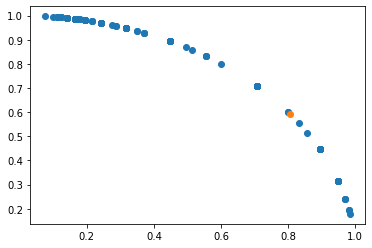

In [504]:
import matplotlib.pyplot as plt
query='american museum'
query_document_vector,document_id1=get_document_vector(query,vocabulary_df,inverted_index_dataframe)
query_vector=get_query_vector(query,vocabulary_df,inverted_index_dataframe)

query_df,document_id2=get_query(query,vocabulary_df,inverted_index_dataframe,data_des)
x_axis=[i[0]/np.linalg.norm(i) for i in query_document_vector]
query_document_vector,document_id1=get_document_vector(query,vocabulary_df,inverted_index_dataframe)
y_axis=[i[1]/np.linalg.norm(i) for i in query_document_vector]
print(len(x_axis),len(y_axis))
plt.scatter(x=x_axis,y=y_axis)
plt.scatter(x=query_vector[0]/np.linalg.norm(query_vector),y=query_vector[1])

In [ ]:
plt.scatter(sphere_mapper.embedding_.T[0], sphere_mapper.embedding_.T[1], c=quer, cmap='Spectral')

In [486]:
query='american museum'
get_top_k(query,vocabulary_df,inverted_index_dataframe,data_des,10)

[2.153207691919445, 1.5766480896111095] [0.5, 0.5]








244it [00:00, 49235.55it/s]


,placeDesc,Title,placeURL,similarity
2076,"A visit to the National Mall in Washington, D....",Mitsitam Native Foods Cafe,https://www.atlasobscura.com/places/mitsitam-n...,0.707060
6872,"Constructed by a local lawyer from 1908-1912, ...",Indian Steps Museum,https://www.atlasobscura.com/places/indian-ste...,0.707060
4989,"In 1882, the Kingdom of Hawai’i unveiled a new...",Iolani Palace,https://www.atlasobscura.com/places/iolani-palace,0.706421
3165,The Renwick Gallery building has the distincti...,Renwick Gallery,https://www.atlasobscura.com/places/renwick-ga...,0.704142
7155,"On most days, San Diego ’s Friendship Park is ...",Friendship Park,https://www.atlasobscura.com/places/friendship...,0.698807
4922,"Famous, powerful figures have criss-crossed th...",SAM 26000,https://www.atlasobscura.com/places/sam-26000,0.698807
5395,Just off the side of the highway in St. Charle...,Weldon Spring Disposal Site,https://www.atlasobscura.com/places/weldon-spr...,0.698807
1134,Hanging in Room 8 of London’s National Gallery...,The Monty Python Foot,https://www.atlasobscura.com/places/the-monty-...,0.698807
3260,"This building, on Maiden Lane in downtown San ...",V. C. Morris Gift Shop,https://www.atlasobscura.com/places/v-c-morris...,0.698807
5147,This early brick Georgian townhouse sits incon...,"Harriet Beecher Stowe, Slavery to Freedom Museum",https://www.atlasobscura.com/places/harriet-be...,0.698807


In [476]:
## add logic for this just for redundancy as the we are using set operations
document_id1==document_id2

True

In [479]:
query_df['similarity']=similarity